# Lab 1: Getting and Exploring Data with Minet and Python Pandas

What we will do:

1. Explain this programming environment
2. Scrape some Tweets based on a keyword search using the *minet* package
3. Use the pandas package to explore the data and generate some descriptive statistics and visualisations (unfortunately no networks today)
4. Learn some Python and command line principles on the way (if you didn't know it before)

There will be two versions of this so called Jupyter Notebook for you to follow along:

* One already filled out for you, in case you want to pay more attention on other things than typing or rather alter the code to try new things.
* Another one with the code 'cells' emptied for you to practice your Python typing skills alongside the lecturer (or maybe sometimes find even better solutions to the given problems)

Secret tip: If you want to try this at home, ChatGPT and Bing Chat got pretty good at generating code for you. However, you still should be able to make sure that the code they produced actually does what you want it to do. So you still have to learn some Python.

But now let's start.

## Get to know the minet package

Let's check whether minet is correctly setup in this programming environment.

You can always look up instructions on how to use it in its [documentation](https://github.com/medialab/minet/blob/master/docs/cli.md).

The output of this cell should be something like `minet 0.67.1`

# THIS PART DOES NOT WORK AT THE MOMENT DUE TO UNPREDICTABLE CHANGES AT TWITTER. FOLLOW THE LATEST MINET DOCUMENTATION FOR ADVICE ON HOW TO GET TWITTER DATA.

In [ ]:
!minet --version

Let's call for help.

In [ ]:
!minet --help

We actually want twitter data, so let's try that

In [ ]:
!minet twitter

Not sure whether the API is still working, so we choose scraping.

In [ ]:
!minet twitter scrape -h

We're interested in discussions about Germany giving battle tanks to Ukraine. So, let's try to scrape 100 tweets, just to try our query, containing the word `Leopard` (the name of a German tank model most requested by Ukraine).

In [ ]:
!minet twitter scrape tweets -l 10 "Leopard"

Guess, we have to refine the query … 

In [ ]:
!minet twitter scrape tweets -l 10 "(ukraine Germany) AND (tank OR tanks OR leopard)"

Meh, still not good enough?

In [ ]:
!minet twitter scrape tweets -l 10 "(Ukraine Germany) AND (tank OR tanks OR leopard) AND (deliver OR delivery OR delivers)"

Ok, this looks better. But we want more tweets, and this will be too much to view here. So let's write to a CSV called `leo_tweets.csv`

In [ ]:
!minet twitter scrape tweets -l 10 "(Ukraine Germany) AND (tank OR tanks OR leopard) AND (deliver OR delivery OR delivers)" -o leo_tweets.csv

Now, open the CSV file on the left to have a look at it whether everything looks ok.

Then come back and we'll collect tweets since the beginning of this year.

(And go for a coffee in the meantime. Should take about 3 minutes.)

In [ ]:
!minet twitter scrape tweets "(Ukraine Germany) AND (tank OR tanks OR leopard) AND (deliver OR delivery OR delivers) since:2023-01-01" -o leo_tweets.csv

For the remainder of this tutorial we will use Pandas. Pandas is basically a swiss army knife for data wrangling and analysis in Python. Think of it as R, but in Python.

You can always look up its documentation [here](https://pandas.pydata.org/docs/user_guide/index.html).

First we need to import the package with `import pandas as pd`.

# FROM HERE ON EVERYTHING WORKS AGAIN WITH A CSV IN THE RIGHT FORMAT

## Explore the Data

In [8]:
import pandas as pd

Then we read in the data with `pd.read_csv`. You can always get help in Jupyter by writing a question mark behind a command and run the cell. Also, try using the (Shift+)TAB key for triggering autocompletion!

In [9]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('../leo_tweets.csv')

In [ ]:
# Display the DataFrame
df

Let's parse the dates with help of the documentation of the read_csv function.

In [ ]:
df = pd.read_csv('../leo_tweets.csv', parse_dates=['local_time'])
df

First, let's see what columns are there

In [16]:
df.columns

Index(['query', 'id', 'timestamp_utc', 'local_time', 'user_screen_name',
       'text', 'possibly_sensitive', 'retweet_count', 'like_count',
       'reply_count', 'impression_count', 'lang', 'to_username', 'to_userid',
       'to_tweetid', 'source_name', 'source_url', 'user_location', 'lat',
       'lng', 'user_id', 'user_name', 'user_verified', 'user_description',
       'user_url', 'user_image', 'user_tweets', 'user_followers',
       'user_friends', 'user_likes', 'user_lists', 'user_created_at',
       'user_timestamp_utc', 'collected_via', 'match_query', 'retweeted_id',
       'retweeted_user', 'retweeted_user_id', 'retweeted_timestamp_utc',
       'quoted_id', 'quoted_user', 'quoted_user_id', 'quoted_timestamp_utc',
       'collection_time', 'url', 'place_country_code', 'place_name',
       'place_type', 'place_coordinates', 'links', 'domains', 'media_urls',
       'media_files', 'media_types', 'media_alt_texts', 'mentioned_names',
       'mentioned_ids', 'hashtags', 'intervention

Which are the most retweeted tweets?

In [17]:
# set display option for text column
pd.set_option('display.max_colwidth', 1000)
# sort by retweet count, and show top 10
df[['retweet_count','user_screen_name','local_time','text']].sort_values(ascending=False, by='retweet_count')[:10]

,retweet_count,user_screen_name,local_time,text
2667,6421,anders_aslund,2023-01-20 22:23:56,Today was a disastrous day for German foreign policy. Germany became a major blockage for Ukrainian victory over Russia by refusing to allow anybody to deliver their Leopard 2 tanks to Ukraine. This may become a black mark for Germany for a long time if not swiftly reversed.
1667,3346,ChillaxBcn,2023-01-24 21:15:50,The Daily Mail writes that following pressure by BORIS JOHNSON and allies Germany finally sends tanks to Ukraine.\n\nIn Germany we all despise Johnson and I can ensure you he had nothing to do with Germany's decision. Though the Mail readers believe that utter nonsense.
1832,3228,WarMonitor3,2023-01-24 18:04:39,Germany to deliver 15 Leopard 2A6 tanks to Ukraine.
2504,1366,Tendar,2023-01-21 19:26:00,"Scholz’ and the SPD’s continued refusal to deliver Leopard 2 tanks to Ukraine, forces me to repurpose that clip. \n\nFree the Leopards!\n#Ukraine #Germany https://twitter.com/Tendar/status/1616879806083121153/video/1"
2349,842,Faytuks,2023-01-22 19:58:10,"BREAKING: Germany will not stand in the way if Poland sends leopard tanks to Ukraine, Germany's foreign minister says - Reuters"
2560,813,anders_aslund,2023-01-21 14:40:41,"First, Germany did not want to be the first country to deliver tanks. \nWhen the UK decided to deliver tanks, Germany insisted the US had to come first.\nNow, Pistorius: Germany is “ready to move quickly” if allies reach a consensus on sending tanks to Ukraine.\nMoving goal poles."
666,701,KyivIndependent,2023-02-02 20:12:44,"⚡️Reuters: Putin claims Russia ready to draw on entire arsenal as Germany sends tanks to Ukraine.\n\nPresident Vladimir Putin criticized Germany for providing Ukraine with the Leopard 2 battle tanks, saying he is ready to draw on Russia’s entire arsenal, according to Reuters."
2567,665,KyivIndependent,2023-01-21 13:55:29,"⚡️Baltic countries' foreign ministers call on Germany to immediately deliver Leopard tanks to Ukraine.\n\n""This is needed to stop Russian aggression, help Ukraine and restore peace in Europe quickly,"" said Latvian FM Edgars Rinkevics on behalf of Lithuanian and Estonian FMs."
1851,588,bayraktar_1love,2023-01-24 17:57:29,"After months of debate, Chancellor Scholz decided to deliver battle tanks to Ukraine. - Spiegel. \nReportedly, Germany will deliver Leopard 2A6, it should be at least one company of tanks. \nhttps://www.sueddeutsche.de/politik/spiegel-bericht-deutschland-liefert-leopard-panzer-an-die-ukraine-1.5735757 https://twitter.com/bayraktar_1love/status/1617944692523675649/photo/1"
797,566,KyivIndependent,2023-01-27 20:21:21,"⚡️Zelensky: Ukraine needs 300-500 tanks.\n\nHis comments come after the U.S., U.K., and Germany announced the delivery of main battle tanks to Ukraine. \n\nHe thanked partners but added that they couldn't waste time in getting tanks to the front line. https://kyivindependent.com/news-feed/zelensky-ukraine-needs-300-500-tanks"


This is nice, but to get a birds-eye view of the data, we need to plot it.

<Axes: title={'center': 'Histogram of Retweet Counts'}, xlabel='Retweet Count', ylabel='Frequency'>

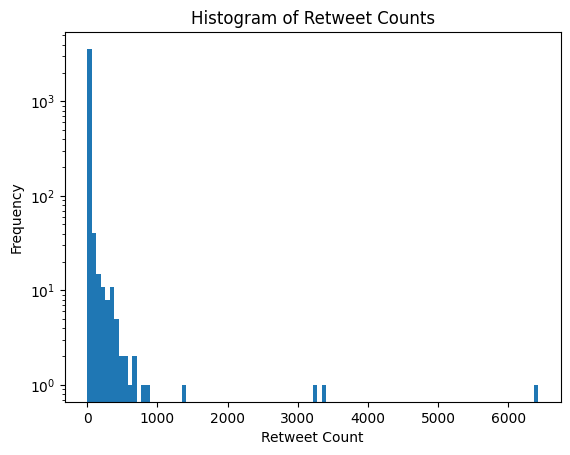

In [18]:
# Let's plot the retweet counts
df['retweet_count'].plot(kind='hist', bins=100, logy=True, xlabel='Retweet Count', ylabel='Frequency', title='Histogram of Retweet Counts')

<Axes: title={'center': 'Scatterplot of Retweet Count vs. Like Count'}, xlabel='Retweet Count', ylabel='Like Count'>

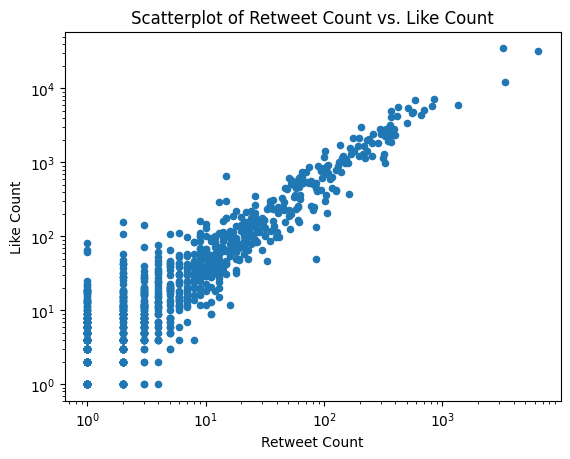

In [19]:
# Is there a relationship between retweet count and like count?
df.plot(kind='scatter', x='retweet_count', y='like_count', logx=True, logy=True, xlabel='Retweet Count', ylabel='Like Count', title='Scatterplot of Retweet Count vs. Like Count')

<Axes: title={'center': 'Scatterplot of Retweet Count vs. View Count'}, xlabel='Retweet Count', ylabel='View Count'>

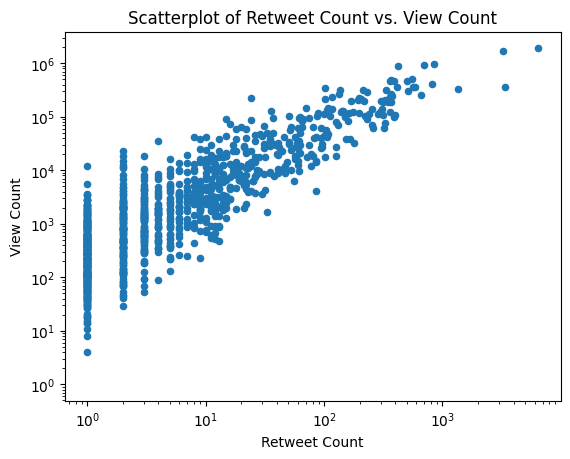

In [20]:
# What about views?
df.plot(kind='scatter', x='retweet_count', y='impression_count', logx=True, logy=True, xlabel='Retweet Count', ylabel='View Count', title='Scatterplot of Retweet Count vs. View Count')

<Axes: title={'center': 'Scatterplot of Retweet Count vs. Reply Count'}, xlabel='Retweet Count', ylabel='Reply Count'>

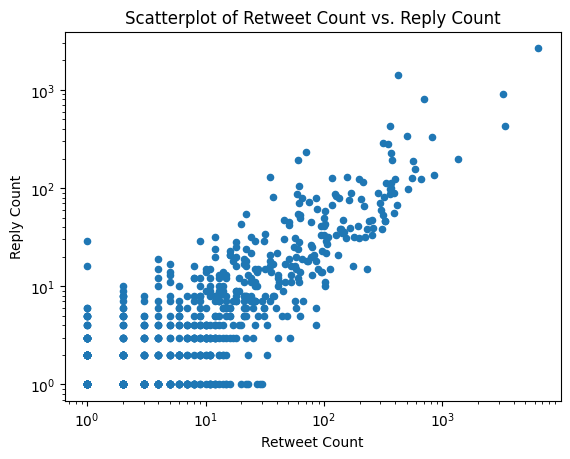

In [21]:
# What about replies?
df.plot(kind='scatter', x='retweet_count', y='reply_count', logx=True, logy=True, xlabel='Retweet Count', ylabel='Reply Count', title='Scatterplot of Retweet Count vs. Reply Count')

<Axes: title={'center': 'Scatterplot of User Followers Count vs. Retweet Count'}, xlabel='User Followers Count', ylabel='Retweet Count'>

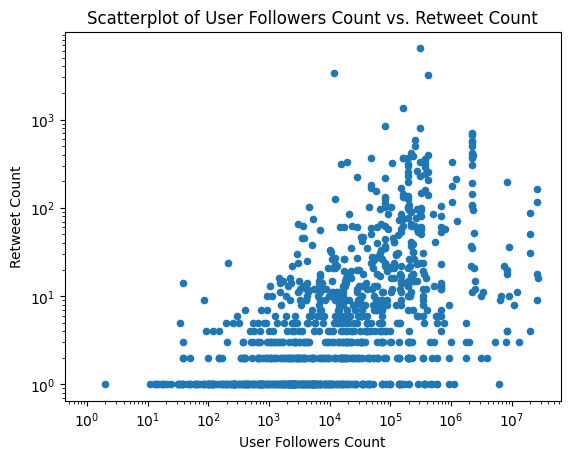

In [22]:
# And followers vs. retweets?
df.plot(kind='scatter', x='user_followers', y='retweet_count', logx=True, logy=True, xlabel='User Followers Count', ylabel='Retweet Count', title='Scatterplot of User Followers Count vs. Retweet Count')

<Axes: title={'center': 'Scatterplot of User Followers Count vs. View Count'}, xlabel='User Followers Count', ylabel='View Count'>

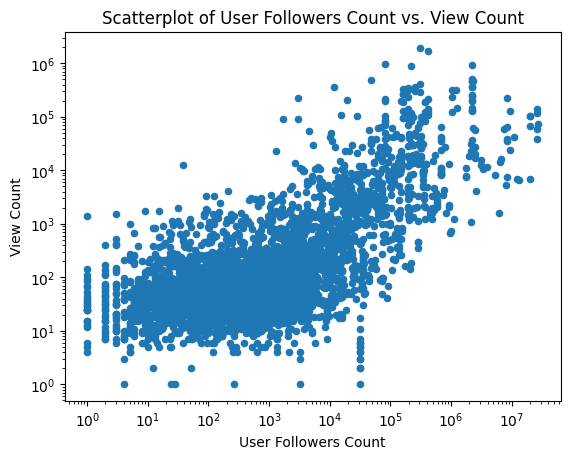

In [23]:
# Followers vs. views?
df.plot(kind='scatter', x='user_followers', y='impression_count', logx=True, logy=True, xlabel='User Followers Count', ylabel='View Count', title='Scatterplot of User Followers Count vs. View Count')

<Axes: title={'center': 'Top 10 Hashtags'}, ylabel='count'>

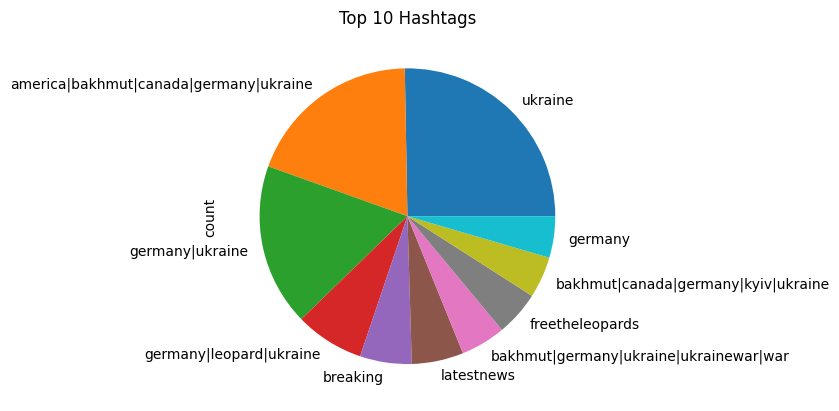

In [24]:
# Finally, let's do a pie chart of the top 10 hashtags
df['hashtags'].value_counts()[:10].plot(kind='pie', title='Top 10 Hashtags')

In [25]:
# This is not right, because the hashtags are not separated. Let's have a look at the data
df['hashtags'].value_counts()

hashtags
ukraine                                                                                     67
america|bakhmut|canada|germany|ukraine                                                      51
germany|ukraine                                                                             47
germany|leopard|ukraine                                                                     20
breaking                                                                                    15
                                                                                            ..
china|england|eu|europeanunion|france|germany|italy|japan|kyiv|moscow|russia|ukraine|usa     1
leopards|ukraine|ukrainerussiawar                                                            1
bidenadministration|m1abrams|nato|ukraine                                                    1
abrams|biden|european|germany|leopard|putin|russia|ukraine|war                               1
freetheleopards|germany                  

<Axes: title={'center': 'Top 10 Hashtags'}, ylabel='count'>

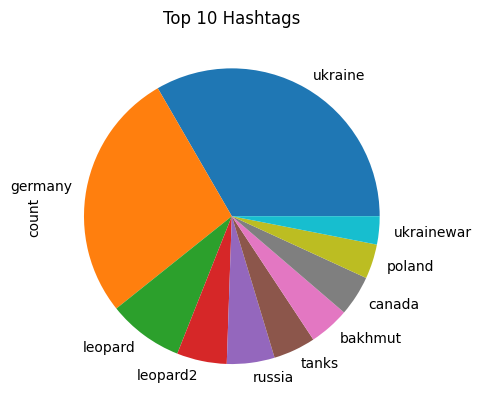

In [26]:
# Let's try to fix this
df['hashtags'].str.split('|', expand=True).stack().value_counts()[:10].plot(kind='pie', title='Top 10 Hashtags')

There's always more than one way to solve the same problem. Let's see who tweeted the most with the groupby and count command.

In [ ]:
df.groupby('user_screen_name')['id'].count().sort_values(ascending=False)

And let's make with the top 30 a nice bar plot with the plot function.

In [ ]:
df.groupby('user_screen_name')['id'].count().sort_values(ascending=False)[:30].plot(kind='bar')

Let's look at their user descriptions.

In [ ]:
# Group by screen name and count the number of tweets per user
top_30 = df.groupby('user_screen_name')['id'].count().sort_values(ascending=False)[:30]

# Merge the top 30 users with their descriptions
top_30_with_descriptions = pd.merge(top_30, df, left_index=True, right_on='user_screen_name')[['user_screen_name', 'user_description']]

# Drop duplicates
top_30_with_descriptions.drop_duplicates()

Let's look at the tweets of the most active account with 'boolean filtering'.

In [ ]:
# Identify the most active users by number of tweets
top_user = top_30_with_descriptions['user_screen_name'].iloc[0]

# Print the top user's screen name
print(top_user)

# Print the top user's tweets
df[df['user_screen_name'] == top_user][['local_time', 'text']].sort_values(by='local_time')

In [31]:
# How many people did the top user reach?
df[df['user_screen_name'] == top_user]['impression_count'].sum()

4349.0

<Axes: title={'center': 'Top 30 Users by Impression Count'}, ylabel='user_screen_name'>

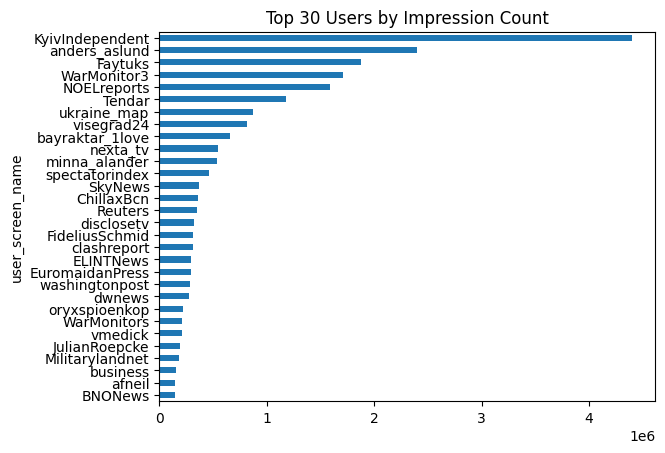

In [39]:
# Who has actually reached the most people? Horizontal barplot of the top 30 users by impression count, sorted by impression count
df.groupby('user_screen_name')['impression_count'].sum().sort_values(ascending=False)[:30].sort_values().plot(kind='barh', title='Top 30 Users by Impression Count')

Let's now look at tweets over time

<Axes: title={'center': 'Number of Tweets per Day'}, xlabel='Date', ylabel='Number of Tweets'>

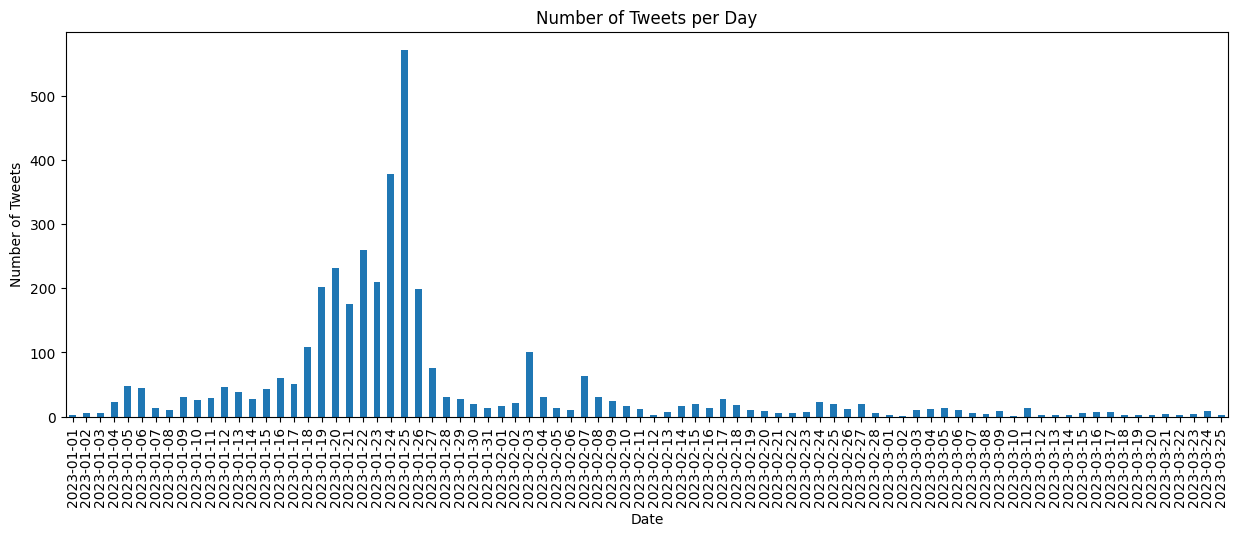

In [34]:
# Count the number of tweets per day
df.groupby(df["local_time"].dt.date)['id'].count().plot(kind="bar", figsize=(15,5), xlabel='Date', ylabel='Number of Tweets', title='Number of Tweets per Day')

There was a lot of activity on certain days. Let's look closer with 'boolean filtering'.

In [ ]:
# filter the dataframe to only include rows with local_time between 2023-01-25 and 2023-01-26, sort by time, and show only the date and text columns
df[(df['local_time'] > '2023-01-25') & (df['local_time'] < '2023-01-26')].sort_values(by='local_time')[['local_time', 'text']]

And now, to have some kind of network analysis at least, let's look at who got the most mentions

In [ ]:
# 1. create a dataframe from a column containing a string of names separated by |
mentioned_names = df[['mentioned_names']]

# 2. expand the string of names into a list of names
expanded = mentioned_names['mentioned_names'].str.split('|', expand=True)

# 3. print the expanded list of names
expanded

In [ ]:
# 4. stack the list of names into a single column
stacked = expanded.stack()

stacked

In [ ]:
# 5. count the number of times each name appears
most_mentioned = stacked.value_counts()

In [ ]:
most_mentioned[100::-1].plot(kind='barh', figsize=(5,15))

# Thanks for your attention! Any Questions?

Ask now or @flxvctr(@mas.to) on Twitter or Mastodon.

That's it. For homework: 

1. Try to generate a DataFrame with one column containing the users tweeting and the other column containing the users mentioned in the tweets.
2. Export the DataFrame to a CSV file.
3. Download and install Gephi and import the CSV file to create a network graph.

Don't worry if you do not succeed. We will do this together in the next lab.